**Final Project: Project question and cleaned dataset**
==

- **What is the question you hope to answer?**
    - Can we predict how a congressperson will vote based on their voting history?
- **What data are you planning to use to answer that question?**
    - The data gathered comes from 'govtrack.us' and comprises congresses 101 through 114. The dataframe is made up of a bill_id, display_name (congressperson's name), id (unique id to identify each congressperson), the congressperson's party, the congressperson's state, the top subject of the bill, and how the congressperson voted.
    - The data was collected in twofold:
        1. Scraping govtrack's api for bill information.
            - i.e. bill_id, bill_subjects, roll number, etc.
            - voting information is not originally included.
        2. Scrapping govrack's api for voting information on a specific bill.
            - Voting data is found from the roll number provided within the bill data.
            - After a bill's roll number is know I was able to call govtrack's api and collect voting data for a specific bill.
    - Once bill and voting information were collected I joined the necessary information into a single dataframe
    - Because the data spanse a couple of decades, there were inconsistencies in the formats.
        - i.e. Votes came as "yea"/"aye", "nay"/"no", and "not voting." Aye's were replaced as yea's, and nay's were replaced as no's.
    - Once the dataset was clean, pd.get_dummies was used to split votes into binary objects.
- **What do you know about the data so far?**
    - From a preliminary analysis that observed the average of total votes based on topics, some congresspeople *are* more likely to vote a certain way depending on the bill's topic.
- **Why did you choose this topic?**
    - I chose this topic because I would like to move forward with this analysis and investigate the relationship between voting habits and campaign contributions. E.g. Does a congressperson's vote favor the industries that more heavily contribute to their campaign? 

**The dataframe is vizualided three different ways**
==

**Typical dataframe:**

In [80]:
clean_congressional_voting.head()

,bill_id,date,display_name,id,party,state,subjects_top_terms,no,not voting,yea
0,hr2-101,1989-05-08,ANDERSON G,A000189,D,CA,Labor and employment,1,0,0
1,hr2-101,1989-05-08,BARNARD DO,B000153,D,GA,Labor and employment,1,0,0
2,hr2-101,1989-05-08,BOSCO DOUG,B000648,D,CA,Labor and employment,1,0,0
3,hr2-101,1989-05-08,FRANK BARN,F000339,D,MA,Labor and employment,1,0,0
4,hr2-101,1989-05-08,GONZALEZ H,G000272,D,TX,Labor and employment,1,0,0


**Groupedby dataframe summing vote type for subject:**

In [101]:
grouped_clean_voting_data_sum.head(20)

,id,party,state,subjects_top_terms,yea,no,not voting
0,A000014,D,HI,Agriculture and food,7,8,0
1,A000014,D,HI,Animals,12,2,0
2,A000014,D,HI,Armed forces and national security,90,37,5
3,A000014,D,HI,"Arts, culture, religion",4,6,1
4,A000014,D,HI,"Awards, medals, prizes",0,1,0
5,A000014,D,HI,"Civil rights and liberties, minority issues",9,5,0
6,A000014,D,HI,Commemorations,113,63,11
7,A000014,D,HI,Commerce,40,21,2
8,A000014,D,HI,Congress,11,10,1
9,A000014,D,HI,Crime and law enforcement,84,51,10


**Groupedby dataframe averaging vote type for subject:**

In [102]:
grouped_clean_voting_data_mean.head(20)

,id,party,state,subjects_top_terms,yea,no,not voting
0,A000014,D,HI,Agriculture and food,0.466667,0.533333,0.000000
1,A000014,D,HI,Animals,0.857143,0.142857,0.000000
2,A000014,D,HI,Armed forces and national security,0.681818,0.280303,0.037879
3,A000014,D,HI,"Arts, culture, religion",0.363636,0.545455,0.090909
4,A000014,D,HI,"Awards, medals, prizes",0.000000,1.000000,0.000000
5,A000014,D,HI,"Civil rights and liberties, minority issues",0.642857,0.357143,0.000000
6,A000014,D,HI,Commemorations,0.604278,0.336898,0.058824
7,A000014,D,HI,Commerce,0.634921,0.333333,0.031746
8,A000014,D,HI,Congress,0.500000,0.454545,0.045455
9,A000014,D,HI,Crime and law enforcement,0.579310,0.351724,0.068966


**Display names are droped in the grouped by data because of data entry errors (different ways to write someones name). 'id' is therefore the ideal way to represent the candidate.**
==

**Let's look at two random congresspeople and the issues they for 'yea' on**
==

display_name    Schulze
id              S000146
party                 R
state                PA
Name: 974, dtype: object
                                                  yea
subjects_top_terms                                   
Agriculture and food                         0.750000
Animals                                      1.000000
Armed forces and national security           0.608696
Arts, culture, religion                      0.750000
Awards, medals, prizes                       1.000000
Civil rights and liberties, minority issues  1.000000
Commerce                                     0.142857
Congress                                     0.000000
Crime and law enforcement                    0.500000
Economics and public finance                 0.611111
Education                                    0.714286
Emergency management                         0.666667
Energy                                       0.000000
Environmental protection                     0.750000
Families       

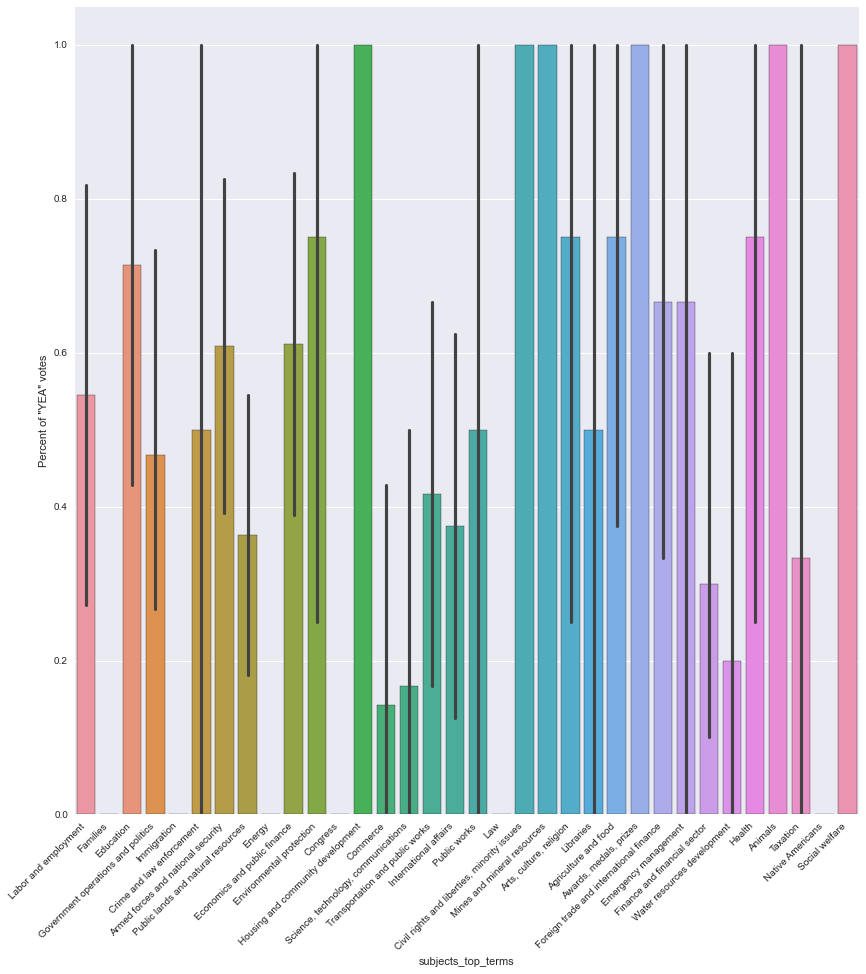

In [200]:
df_subset = clean_congressional_voting[clean_congressional_voting['id'] == clean_congressional_voting['id'][974]]
print clean_congressional_voting.iloc[974, 2:6]
print df_subset.groupby(['subjects_top_terms'])[['yea']].mean()

import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='subjects_top_terms', 
              y='yea',
              kind='bar',
              data = df_subset,
              size = 12
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')
plt.ylim(0, 1.05)
plt.ylabel('Percent of "YEA" votes');

display_name    GEJDENSON
id                G000120
party                   D
state                  CT
Name: 128, dtype: object
                                                  yea
subjects_top_terms                                   
Agriculture and food                         0.500000
Animals                                      0.666667
Armed forces and national security           0.604167
Arts, culture, religion                      0.500000
Awards, medals, prizes                       0.000000
Civil rights and liberties, minority issues  0.750000
Commemorations                               0.625000
Commerce                                     0.739130
Congress                                     0.571429
Crime and law enforcement                    0.584615
Economics and public finance                 0.722222
Education                                    0.500000
Emergency management                         0.750000
Energy                                       0.700000
Environ

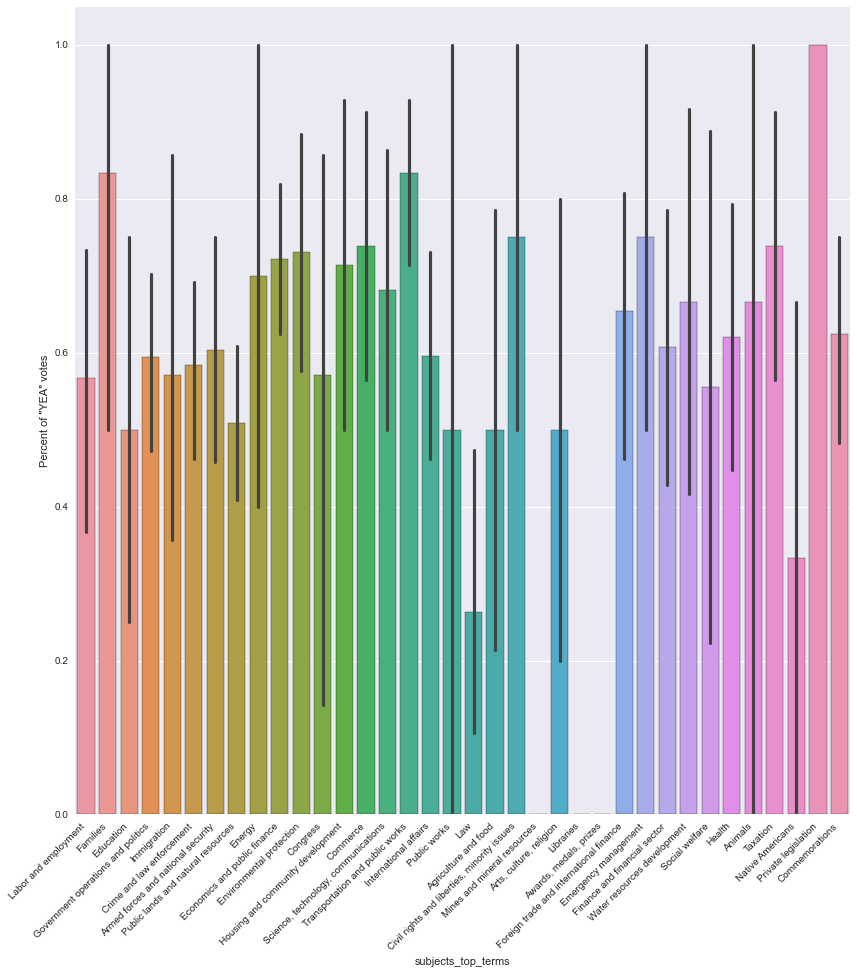

In [201]:
df_subset = clean_congressional_voting[clean_congressional_voting['id'] == clean_congressional_voting['id'][128]]
print clean_congressional_voting.iloc[128, 2:6]
print df_subset.groupby(['subjects_top_terms'])[['yea']].mean()

import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='subjects_top_terms', 
              y='yea',
              kind='bar',
              data = df_subset,
              size = 12
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')
plt.ylim(0, 1.05)
plt.ylabel('Percent of "YEA" votes');

**Let's look at the same two congresspeople and the issues they for 'no' on**
==

display_name    Schulze
id              S000146
party                 R
state                PA
Name: 974, dtype: object
                                                   no
subjects_top_terms                                   
Agriculture and food                         0.000000
Animals                                      0.000000
Armed forces and national security           0.347826
Arts, culture, religion                      0.250000
Awards, medals, prizes                       0.000000
Civil rights and liberties, minority issues  0.000000
Commerce                                     0.571429
Congress                                     1.000000
Crime and law enforcement                    0.500000
Economics and public finance                 0.222222
Education                                    0.285714
Emergency management                         0.333333
Energy                                       1.000000
Environmental protection                     0.250000
Families       

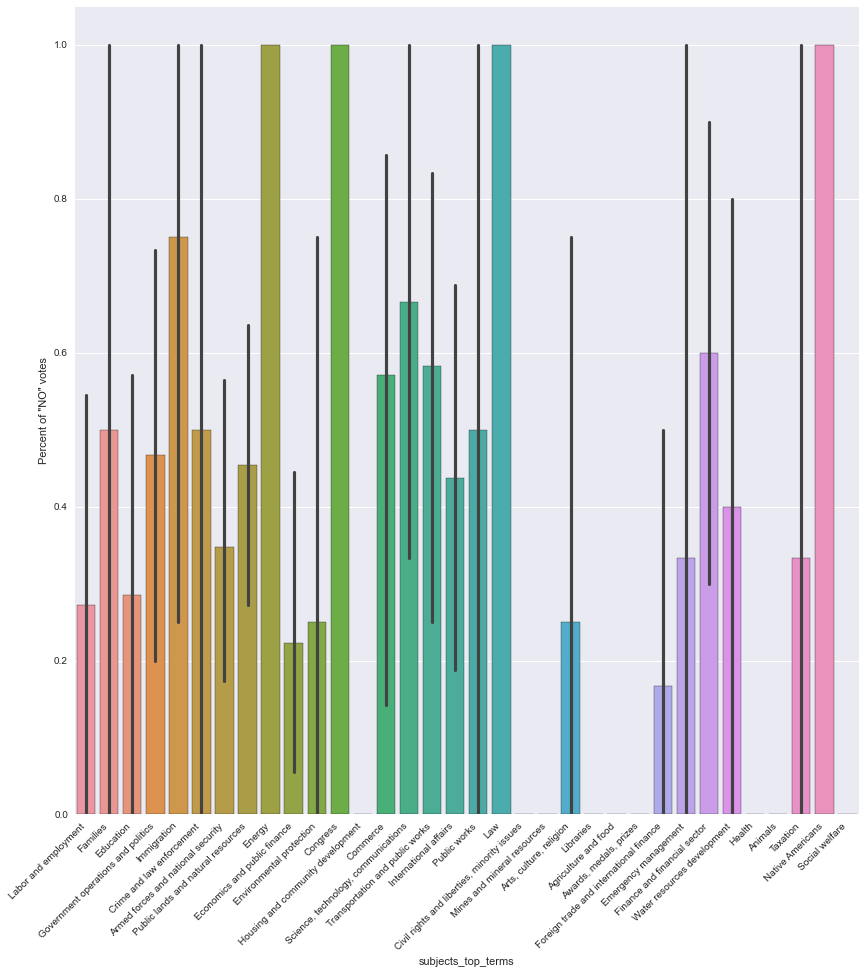

In [202]:
df_subset = clean_congressional_voting[clean_congressional_voting['id'] == clean_congressional_voting['id'][974]]
print clean_congressional_voting.iloc[974, 2:6]
print df_subset.groupby(['subjects_top_terms'])[['no']].mean()

import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='subjects_top_terms', 
              y='no',
              kind='bar',
              data = df_subset,
              size = 12
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')
plt.ylim(0, 1.05)
plt.ylabel('Percent of "NO" votes');

display_name    GEJDENSON
id                G000120
party                   D
state                  CT
Name: 128, dtype: object
                                                   no
subjects_top_terms                                   
Agriculture and food                         0.500000
Animals                                      0.333333
Armed forces and national security           0.375000
Arts, culture, religion                      0.500000
Awards, medals, prizes                       1.000000
Civil rights and liberties, minority issues  0.250000
Commemorations                               0.303571
Commerce                                     0.260870
Congress                                     0.428571
Crime and law enforcement                    0.369231
Economics and public finance                 0.250000
Education                                    0.500000
Emergency management                         0.250000
Energy                                       0.300000
Environ

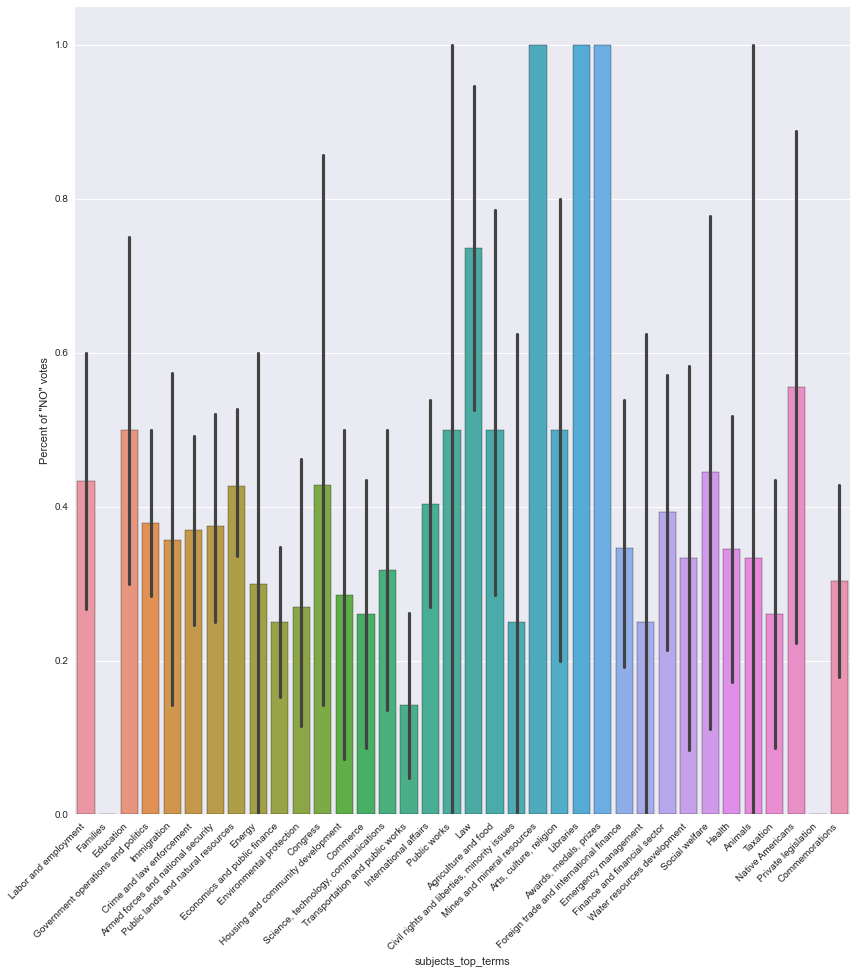

In [197]:
df_subset = clean_congressional_voting[clean_congressional_voting['id'] == clean_congressional_voting['id'][128]]
print clean_congressional_voting.iloc[128, 2:6]
print df_subset.groupby(['subjects_top_terms'])[['no']].mean()

import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='subjects_top_terms', 
              y='no',
              kind='bar',
              data = df_subset,
              size = 12
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')
plt.ylim(0, 1.05)
plt.ylabel('Percent of "NO" votes');

**There are definitely patters on how these two congresspeople vote. A deeper analysis should uncover more meaningful patterns**
==